In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


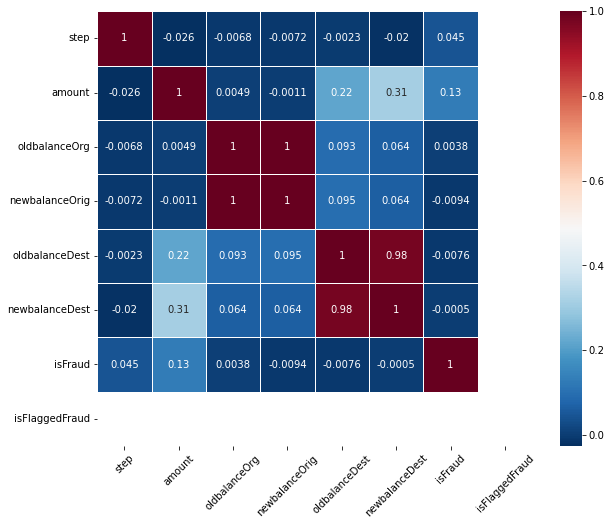

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='RdBu_r', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()
fig.savefig('corrplot.png', transparent=True)

In [30]:
df.isFlaggedFraud.value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

0    1047433
1       1142
Name: isFraud, dtype: int64


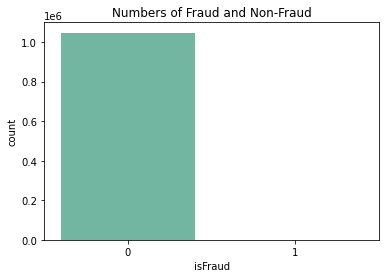

In [31]:
print(df.isFraud.value_counts())

fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud', palette='Set2')
plt.title('Numbers of Fraud and Non-Fraud')
plt.show()
fig.savefig('fraud_count.png', transparent=True)

In [32]:
df.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

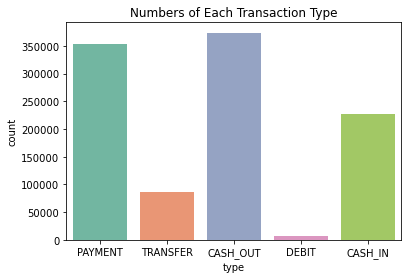

In [33]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Numbers of Each Transaction Type')
plt.show()
fig.savefig('type_count.png', transparent=True)

isFraud
0     157539.6628
1    1192628.9321
Name: amount, dtype: object


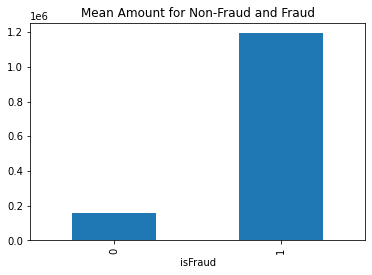

In [34]:
print(df.groupby('isFraud').amount.mean().apply(lambda x: '%.4f' % x))

fig = plt.figure(figsize=(6, 4))
plt.title('Mean Amount for Non-Fraud and Fraud')
df.groupby('isFraud').amount.mean().plot.bar()
plt.show()
fig.savefig('mean_amount_fraud.png', transparent=True)

In [35]:
ols_x = df.isFraud.astype('category')
ols_x = sm.add_constant(ols_x)
model = sm.OLS(df.amount, ols_x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:20:06   Log-Likelihood:            -1.4573e+07
No. Observations:             1048575   AIC:                         2.915e+07
Df Residuals:                 1048573   BIC:                         2.915e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.575e+05    256.714    613.677      0.0

type
CASH_IN     169923.6485
CASH_OUT    184039.5925
DEBIT         5878.5170
PAYMENT      11122.9072
TRANSFER    634403.8324
Name: amount, dtype: object


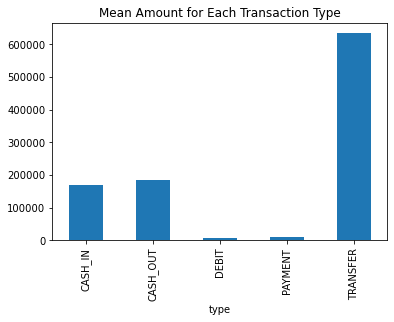

In [36]:
print(df.groupby('type').amount.mean().apply(lambda x: '%.4f' % x))

fig = plt.figure(figsize=(6, 4))
plt.title('Mean Amount for Each Transaction Type')
df.groupby('type').amount.mean().plot.bar()
plt.show()
fig.savefig('mean_amount_type.png', transparent=True, bbox_inches='tight')

CASH_OUT    578
TRANSFER    564
Name: type, dtype: int64


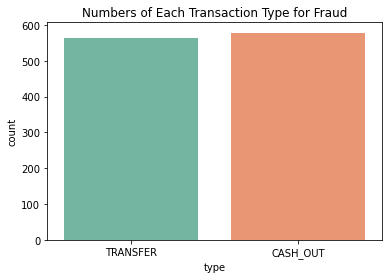

In [37]:
df_fraud = df.loc[df.isFraud == 1]
print(df_fraud.type.value_counts())

fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df_fraud, x='type', palette='Set2')
plt.title('Numbers of Each Transaction Type for Fraud')
plt.show()
fig.savefig('type_count_fraud.png', transparent=True)

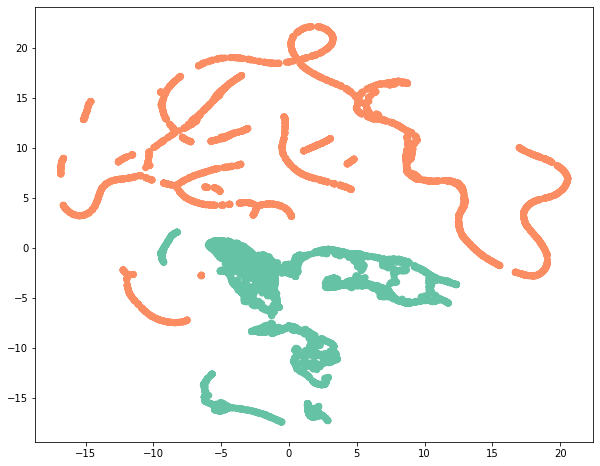

In [59]:
umap_sample = df.sample(n=5000, replace=False)
umap_sample_X = umap_sample[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
umap_sample_y = umap_sample[['isFraud']]

umap_resample_X, umap_resample_y = SMOTE().fit_resample(umap_sample_X, umap_sample_y)

fig = plt.figure(figsize=(10, 8))

reducer = umap.UMAP()
scaled_umap_sample = StandardScaler().fit_transform(umap_resample_X)
embedding = reducer.fit_transform(scaled_umap_sample)

plt.scatter(
    embedding[:, 0], 
    embedding[:, 1],
    c=[sns.color_palette('Set2')[x] for x in umap_resample_y.isFraud.map({0: 0, 1: 1})]
)
plt.show()
fig.savefig('umap.png', transparent=True)